Load all the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math
from math import sqrt
from pylab import rcParams

In [2]:
#IMPORT DATA
btc_data = pd.read_csv('content/BTC2019_2024.csv',index_col='date')
bnb_data = pd.read_csv('content/BNB2019_2024.csv',index_col='date')
eth_data = pd.read_csv('content/ETH2019_2024.csv',index_col='date')

btc_data = btc_data.dropna()
bnb_data = bnb_data.dropna()
eth_data = eth_data.dropna()

print('Shape of bitcoin data', btc_data.shape)
print('Shape of binance data', bnb_data.shape)
print('Shape of ethereum data', eth_data.shape)


Shape of bitcoin data (1815, 5)
Shape of binance data (1815, 5)
Shape of ethereum data (1815, 5)


In [3]:
btc_data.head()

,Open,High,Low,Close,Volume
date,,,,,
2019-03-01,3853.757080,3907.795410,3851.692383,3859.583740,7661247975
2019-03-02,3855.318115,3874.607422,3832.127930,3864.415039,7578786076
2019-03-03,3862.266113,3875.483643,3836.905762,3847.175781,7253558152
2019-03-04,3845.091553,3867.381836,3733.749756,3761.557129,9029175788
2019-03-05,3759.832520,3903.916748,3745.183105,3896.375000,10174126415


In [4]:
bnb_data.head()

,Open,High,Low,Close,Volume
date,,,,,
2019-03-01,10.356931,11.607489,10.325634,11.393217,117838677
2019-03-02,11.384693,11.915753,10.960816,11.869744,120807894
2019-03-03,11.845305,11.964979,11.352064,11.537903,89868246
2019-03-04,11.538013,11.599405,11.070543,11.545945,89421231
2019-03-05,11.520388,13.841443,11.520388,13.811967,237026335


In [5]:
eth_data.head()

,Open,High,Low,Close,Volume
date,,,,,
2019-03-01,136.836243,138.995270,136.434784,136.443619,3756124824
2019-03-02,136.350082,137.184799,132.436386,134.206955,3747176425
2019-03-03,134.786118,135.849289,131.328857,132.249420,3454374053
2019-03-04,132.157883,132.729141,125.402702,127.774124,4008171341
2019-03-05,127.792953,138.229980,126.735298,137.822388,4764849990


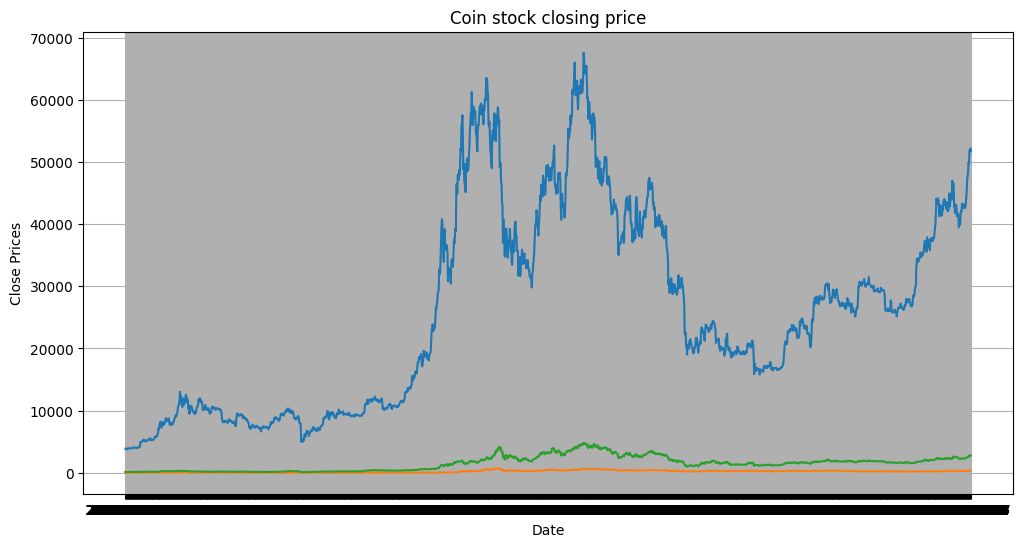

In [6]:
#Plot "Close" price of btc, bnb, and eth.
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(btc_data['Close'])
plt.plot(bnb_data['Close'])
plt.plot(eth_data['Close'])
plt.title('Coin stock closing price')
plt.show()

Only using 'Close' for predicting

In [7]:
df_btc = btc_data['Close']
df_bnb = bnb_data['Close']
df_eth = eth_data['Close']

Test for staionarity

In [8]:
def test_stationarity(timeseries):
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [9]:
#Test bitcoin dataset
test_stationarity(btc_data['Close'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.383119
p-value                           0.590342
#Lags Used                        9.000000
Number of Observations Used    1805.000000
Critical Value (1%)              -3.433978
Critical Value (5%)              -2.863143
Critical Value (10%)             -2.567623
dtype: float64


In [10]:
#Test Binance Dataset
test_stationarity(bnb_data['Close'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.777350
p-value                           0.391763
#Lags Used                       25.000000
Number of Observations Used    1789.000000
Critical Value (1%)              -3.434011
Critical Value (5%)              -2.863157
Critical Value (10%)             -2.567631
dtype: float64


In [11]:
#Test Ethereum Dataset
test_stationarity(eth_data['Close'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.416200
p-value                           0.574486
#Lags Used                       17.000000
Number of Observations Used    1797.000000
Critical Value (1%)              -3.433994
Critical Value (5%)              -2.863150
Critical Value (10%)             -2.567627
dtype: float64


Eliminate trend

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


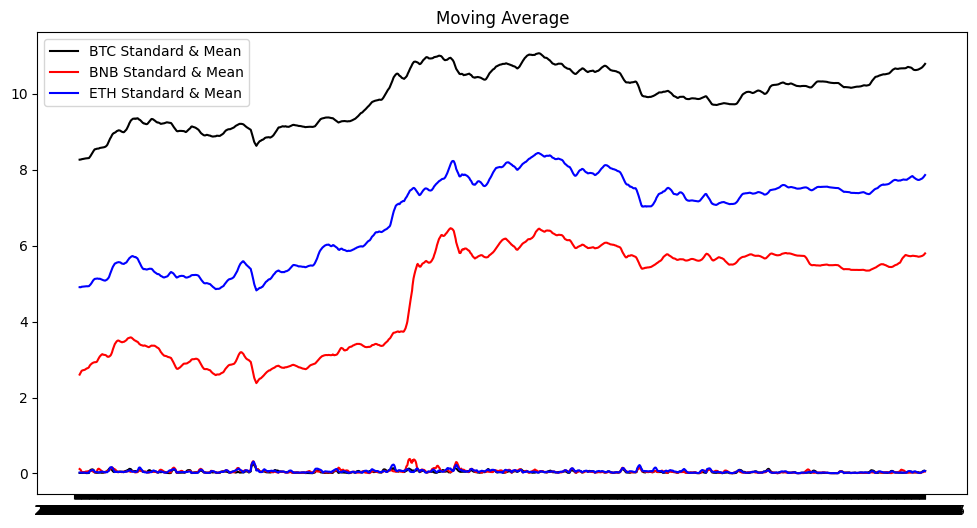

In [12]:
rcParams['figure.figsize'] = 12, 6

df_log_btc = np.log(df_btc)
df_log_bnb = np.log(df_bnb)
df_log_eth = np.log(df_eth)

moving_avg_btc = df_log_btc.rolling(12).mean()
moving_avg_bnb = df_log_bnb.rolling(12).mean()
moving_avg_eth = df_log_eth.rolling(12).mean()

std_dev_btc = df_log_btc.rolling(12).std()
std_dev_bnb = df_log_bnb.rolling(12).std()
std_dev_eth = df_log_eth.rolling(12).std()

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev_btc, color ="black", label = "BTC Standard & Mean")
plt.plot(std_dev_bnb, color ="red", label = "BNB Standard & Mean")
plt.plot(std_dev_eth, color ="blue", label = "ETH Standard & Mean")
plt.plot(moving_avg_btc, color="black")
plt.plot(moving_avg_bnb, color="red")
plt.plot(moving_avg_eth, color="blue")
plt.legend()
plt.show()

Get the p,d,q by using Auto Arima

In [13]:
#BITCOIN
stepwise_fit = auto_arima(df_log_btc, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6963.600, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6962.753, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6965.128, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6964.809, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6961.803, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6965.640, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6963.641, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6963.643, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6966.847, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6963.381, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6965.369, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6965.709, Time=0.24 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.694 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1815
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3487.423
Date:                Thu, 20 Jun 2024   AIC                          -6966.847
Time:                        22:50:40   BIC                          -6944.834
Sample:                    03-01-2019   HQIC                         -6958.724
                         - 02-17-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0024      0.001      1.685      0.092      -0.000       0.005
ar.L1         -0.6986      0.147     -4.757      0.000      -0.986      -0.411
ma.L1          0.6508      0.155      4.187      0.000       0.346       0.955
sigma2         0.0013   1.36e-05     92.161      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             27937.07
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                            -1.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The Auto ARIMA model provided the best value of p,d, and q for bitcoin dataset as 1, 1 and 1 respectively.

In [14]:
#BINANCE
stepwise_fit = auto_arima(df_log_bnb, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5878.211, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5854.318, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5861.921, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5860.394, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5853.499, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5874.286, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5873.468, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-5874.655, Time=0.64 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-5875.421, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5875.342, Time=0.46 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-5874.230, Time=1.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-5871.465, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-5873.468, Time=1.57 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-5876.833, Time=0.32 sec

Best model:  ARIMA

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1815
Model:               SARIMAX(2, 1, 2)   Log Likelihood                2945.105
Date:                Thu, 20 Jun 2024   AIC                          -5878.211
Time:                        22:50:48   BIC                          -5845.191
Sample:                    03-01-2019   HQIC                         -5866.027
                         - 02-17-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0005      0.001      1.004      0.315      -0.000       0.002
ar.L1          0.0611      0.086      0.711      0.477      -0.107       0.229
ar.L2          0.6647      0.088      7.587      0.000       0.493       0.836
ma.L1         -0.1134      0.093     -1.223      0.221      -0.295       0.068
ma.L2         -0.5720      0.093     -6.150      0.000      -0.754      -0.390
sigma2         0.0023   2.47e-05     92.240      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):             38074.25
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The Auto ARIMA model provided the best value of p,d, and q for binance dataset as 2, 1 and 2 respectively.

In [15]:
#ETHEREUM
stepwise_fit = auto_arima(df_log_eth, trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6113.984, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6106.230, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6111.993, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6111.315, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6105.748, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6115.700, Time=0.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-6113.185, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6117.658, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6111.592, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6113.586, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-6116.987, Time=0.32 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.266 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1815
Model:               SARIMAX(1, 1, 1)   Log Likelihood                3062.829
Date:                Thu, 20 Jun 2024   AIC                          -6117.658
Time:                        22:50:51   BIC                          -6095.645
Sample:                    03-01-2019   HQIC                         -6109.535
                         - 02-17-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0030      0.002      1.543      0.123      -0.001       0.007
ar.L1         -0.7944      0.080     -9.973      0.000      -0.951      -0.638
ma.L1          0.7383      0.089      8.297      0.000       0.564       0.913
sigma2         0.0020   2.37e-05     84.467      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             20080.48
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -1.32
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The Auto ARIMA model provided the best value of p,d, and q for ethereum dataset as 1, 1 and 1 respectively.

Split data into train and test set

In [16]:
train_ratio = 0.6

In [17]:
# BITCOIN 7:3 SPLIT
train_btc = df_log_btc[:int(len(df_log_btc)*train_ratio)]
test_btc = df_log_btc[int(len(df_log_btc)*train_ratio):]
print(train_btc.shape, test_btc.shape)

(1089,) (726,)


In [18]:
# BINANCE 7:3 SPLIT
train_bnb = df_log_bnb[:int(len(df_log_bnb)*train_ratio)]
test_bnb = df_log_bnb[int(len(df_log_bnb)*train_ratio):]
print(train_bnb.shape, test_bnb.shape)

(1089,) (726,)


In [19]:
# ETHEREUM 7:3 SPLIT
train_eth = df_log_eth[:int(len(df_log_eth)*train_ratio)]
test_eth = df_log_eth[int(len(df_log_eth)*train_ratio):]
print(train_eth.shape, test_eth.shape)

(1089,) (726,)


# Modeling

## BTC

In [20]:
#BITCOIN
model_btc = ARIMA(train_btc, order=(1,1,1))
model_btc = model_btc.fit()
model_btc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1089
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1973.405
Date:                Thu, 20 Jun 2024   AIC                          -3940.810
Time:                        22:50:52   BIC                          -3925.834
Sample:                    03-01-2019   HQIC                         -3935.142
                         - 02-21-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7964      0.116     -6.863      0.000      -1.024      -0.569
ma.L1          0.7459      0.128      5.823      0.000       0.495       0.997
sigma2         0.0016   2.08e-05     74.894      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             17414.41
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -1.44
Prob(H) (two-sided):                  0.17   Kurtosis:                        22.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
#Predict Results
start = len(train_btc)
end = len(train_btc) + len(test_btc) -1
pred = model_btc.predict(start=start, end=end)
print(pred)

2022-02-22    10.521385
2022-02-23    10.520844
2022-02-24    10.521275
2022-02-25    10.520932
2022-02-26    10.521205
                ...    
2024-02-13    10.521084
2024-02-14    10.521084
2024-02-15    10.521084
2024-02-16    10.521084
2024-02-17    10.521084
Freq: D, Name: predicted_mean, Length: 726, dtype: float64


In [22]:
#Report Performance
rmse_btc = root_mean_squared_error(test_btc,pred)
print('RMSE: '+str(rmse_btc))

mse_btc = mean_squared_error(test_btc, pred)
print('MSE: '+str(mse_btc))

mape_btc = mean_absolute_percentage_error(test_btc, pred)
print('MAPE: '+str(mape_btc))

RMSE: 0.4230373843179571
MSE: 0.17896062853057895
MAPE: 0.03565480474811402


In [23]:
model_btc_2 = ARIMA(df_log_btc, order=(1,1,5))
model_btc_2 = model_btc_2.fit()
btc_data.tail()

,Open,High,Low,Close,Volume
date,,,,,
2024-02-13,49941.359375,50358.390625,48406.496094,49742.441406,35593051468
2024-02-14,49733.445313,52021.371094,49296.832031,51826.695313,39105608050
2024-02-15,51836.785156,52820.066406,51371.628906,51938.554688,38564360533
2024-02-16,51937.726563,52537.968750,51641.367188,52160.203125,28180567298
2024-02-17,52161.675781,52180.582031,51558.039063,51724.253906,22865082368


In [24]:
# index for future dates
index_future_dates = pd.RangeIndex(start=len(btc_data), stop=len(btc_data)+91, step=1)
pred_btc = model_btc_2.predict(start=len(btc_data), end=len(btc_data)+90).rename('ARIMA prediction')
pred_btc.index = index_future_dates

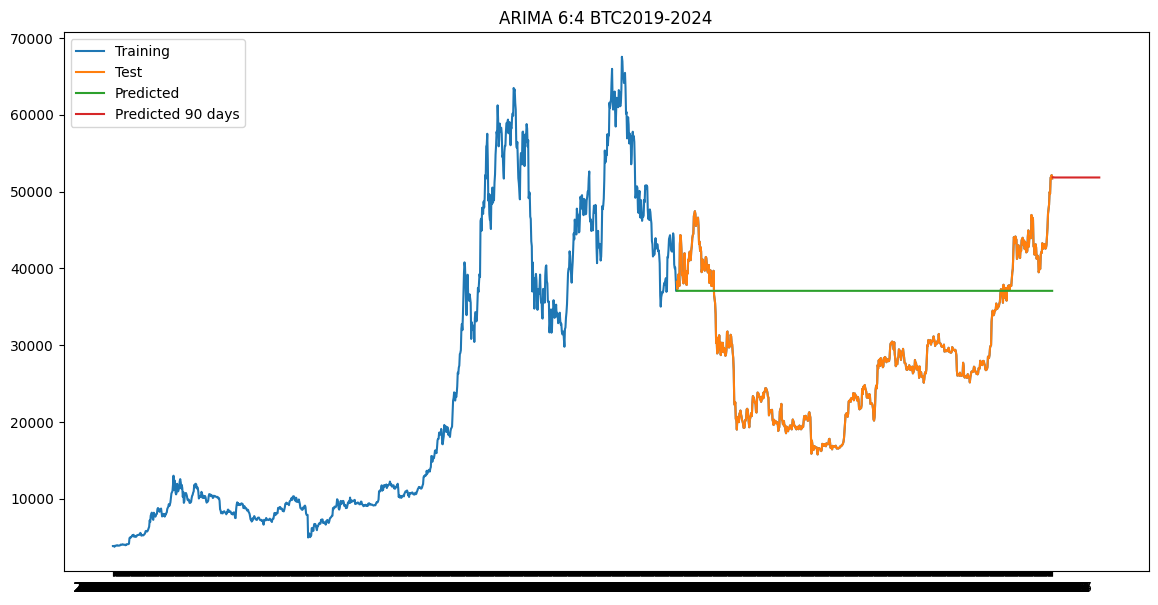

In [25]:
# Plotting the results
plt.figure(figsize=(14,7))
plt.plot(np.exp(df_log_btc), label='Training')
plt.plot(test_btc.index, np.exp(test_btc), label='Test')
plt.plot(test_btc.index, np.exp(pred), label='Predicted')
plt.plot(pred_btc.index, np.exp(pred_btc), label='Predicted 90 days')
plt.title('ARIMA 6:4 BTC2019-2024')
plt.legend(loc='upper left')
plt.show()

## BNB

In [26]:
#BINANCE
model_bnb = ARIMA(train_bnb, order=(2,1,2))
model_bnb = model_bnb.fit()
model_bnb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1089
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1584.310
Date:                Thu, 20 Jun 2024   AIC                          -3158.620
Time:                        22:51:00   BIC                          -3133.660
Sample:                    03-01-2019   HQIC                         -3149.173
                         - 02-21-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1428      0.070      2.043      0.041       0.006       0.280
ar.L2          0.7743      0.062     12.506      0.000       0.653       0.896
ma.L1         -0.1976      0.079     -2.513      0.012      -0.352      -0.044
ma.L2         -0.6783      0.072     -9.472      0.000      -0.819      -0.538
sigma2         0.0032   4.87e-05     65.418      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14327.22
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.98   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
#Predict Results
start = len(train_btc)
end = len(train_btc) + len(test_btc) -1
pred = model_bnb.predict(start=start, end=end)
print(pred)

2022-02-22    5.875743
2022-02-23    5.870395
2022-02-24    5.868823
2022-02-25    5.864457
2022-02-26    5.862616
                ...   
2024-02-13    5.801414
2024-02-14    5.801414
2024-02-15    5.801414
2024-02-16    5.801414
2024-02-17    5.801414
Freq: D, Name: predicted_mean, Length: 726, dtype: float64


In [28]:
#Report Performance
rmse_bnb = root_mean_squared_error(test_bnb,pred)
print('RMSE: '+str(rmse_bnb))

mse_bnb = mean_squared_error(test_bnb, pred)
print('MSE: '+str(mse_bnb))

mape_bnb = mean_absolute_percentage_error(test_bnb, pred)
print('MAPE: '+str(mape_bnb))

RMSE: 0.23905564555713416
MSE: 0.057147601672738156
MAPE: 0.03556451941167655


In [29]:
model_bnb_2 = ARIMA(df_log_bnb, order=(2,1,2))
model_bnb_2 = model_bnb_2.fit()
btc_data.tail()

,Open,High,Low,Close,Volume
date,,,,,
2024-02-13,49941.359375,50358.390625,48406.496094,49742.441406,35593051468
2024-02-14,49733.445313,52021.371094,49296.832031,51826.695313,39105608050
2024-02-15,51836.785156,52820.066406,51371.628906,51938.554688,38564360533
2024-02-16,51937.726563,52537.968750,51641.367188,52160.203125,28180567298
2024-02-17,52161.675781,52180.582031,51558.039063,51724.253906,22865082368


In [30]:
index_future_dates = pd.RangeIndex(start=len(bnb_data), stop=len(bnb_data)+91, step=1)
pred_bnb = model_bnb_2.predict(start=len(bnb_data), end=len(bnb_data)+90).rename('ARIMA prediction')
pred_bnb.index = index_future_dates
print(pred_bnb)

1815    5.879803
1816    5.880450
1817    5.882111
1818    5.882551
1819    5.883410
          ...   
1901    5.885052
1902    5.885052
1903    5.885052
1904    5.885052
1905    5.885052
Name: ARIMA prediction, Length: 91, dtype: float64


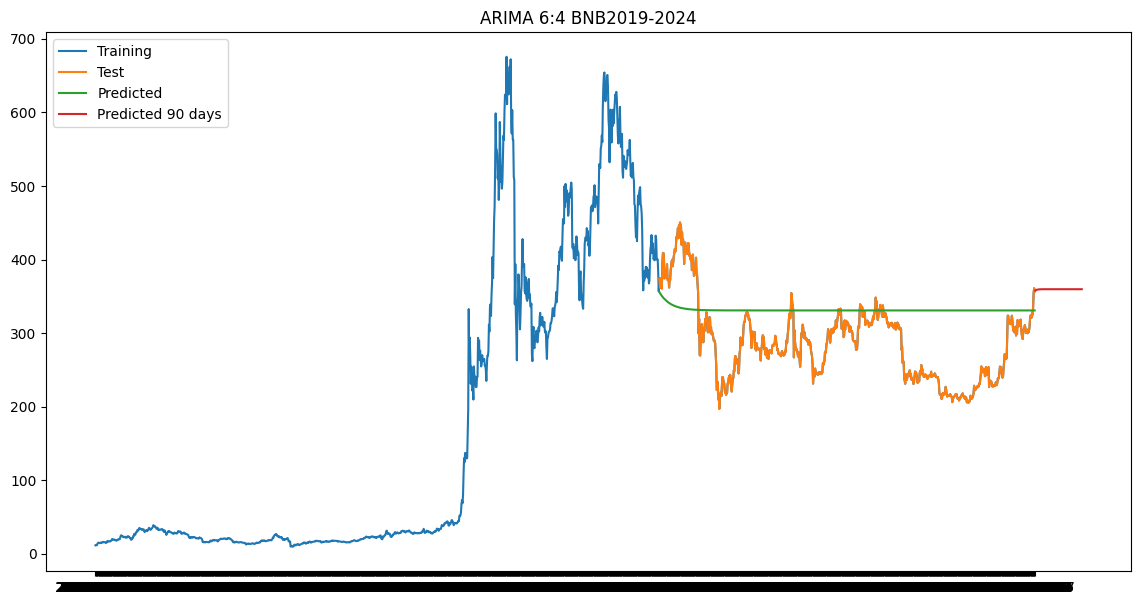

In [31]:
# Plotting the results
plt.figure(figsize=(14,7))
plt.plot(np.exp(df_log_bnb), label='Training')
plt.plot(test_bnb.index, np.exp(test_bnb), label='Test')
plt.plot(test_bnb.index, np.exp(pred), label='Predicted')
plt.plot(pred_bnb.index, np.exp(pred_bnb), label='Predicted 90 days')
plt.title('ARIMA 6:4 BNB2019-2024')
plt.legend(loc='upper left')
plt.show()

## ETH

In [32]:
#ETHEREUM
model_eth = ARIMA(train_eth, order=(1,1,1))
model_eth = model_eth.fit()
model_eth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1089
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1717.639
Date:                Thu, 20 Jun 2024   AIC                          -3429.278
Time:                        22:51:09   BIC                          -3414.302
Sample:                    03-01-2019   HQIC                         -3423.609
                         - 02-21-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8513      0.070    -12.157      0.000      -0.989      -0.714
ma.L1          0.7879      0.083      9.533      0.000       0.626       0.950
sigma2         0.0025   3.61e-05     68.912      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             12406.56
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                            -1.52
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
#Predict Results
start = len(train_eth)
end = len(train_eth) + len(test_eth) -1
pred = model_eth.predict(start=start, end=end)
print(pred)

2022-02-22    7.851929
2022-02-23    7.852964
2022-02-24    7.852083
2022-02-25    7.852833
2022-02-26    7.852195
                ...   
2024-02-13    7.852488
2024-02-14    7.852488
2024-02-15    7.852488
2024-02-16    7.852488
2024-02-17    7.852488
Freq: D, Name: predicted_mean, Length: 726, dtype: float64


In [34]:
#Report Performance
rmse_eth = root_mean_squared_error(test_eth,pred)
print('RMSE: '+str(rmse_eth))

mse_eth = mean_squared_error(test_eth, pred)
print('MSE: '+str(mse_eth))

mape_eth = mean_absolute_percentage_error(test_eth, pred)
print('MAPE: '+str(mape_eth))

RMSE: 0.4481535532402131
MSE: 0.20084160728182854
MAPE: 0.05359022732606685


In [35]:
model_eth_2 = ARIMA(df_log_eth, order=(2,1,2))
model_eth_2 = model_eth_2.fit()
btc_data.tail()

,Open,High,Low,Close,Volume
date,,,,,
2024-02-13,49941.359375,50358.390625,48406.496094,49742.441406,35593051468
2024-02-14,49733.445313,52021.371094,49296.832031,51826.695313,39105608050
2024-02-15,51836.785156,52820.066406,51371.628906,51938.554688,38564360533
2024-02-16,51937.726563,52537.968750,51641.367188,52160.203125,28180567298
2024-02-17,52161.675781,52180.582031,51558.039063,51724.253906,22865082368


In [36]:
index_future_dates = pd.RangeIndex(start=len(eth_data), stop=len(eth_data)+91, step=1)
pred_eth = model_eth_2.predict(start=len(eth_data), end=len(eth_data)+90).rename('ARIMA prediction')
pred_eth.index = index_future_dates
print(pred_eth)

1815    7.933058
1816    7.932899
1817    7.934760
1818    7.934911
1819    7.936287
          ...   
1901    7.946381
1902    7.946382
1903    7.946384
1904    7.946385
1905    7.946386
Name: ARIMA prediction, Length: 91, dtype: float64


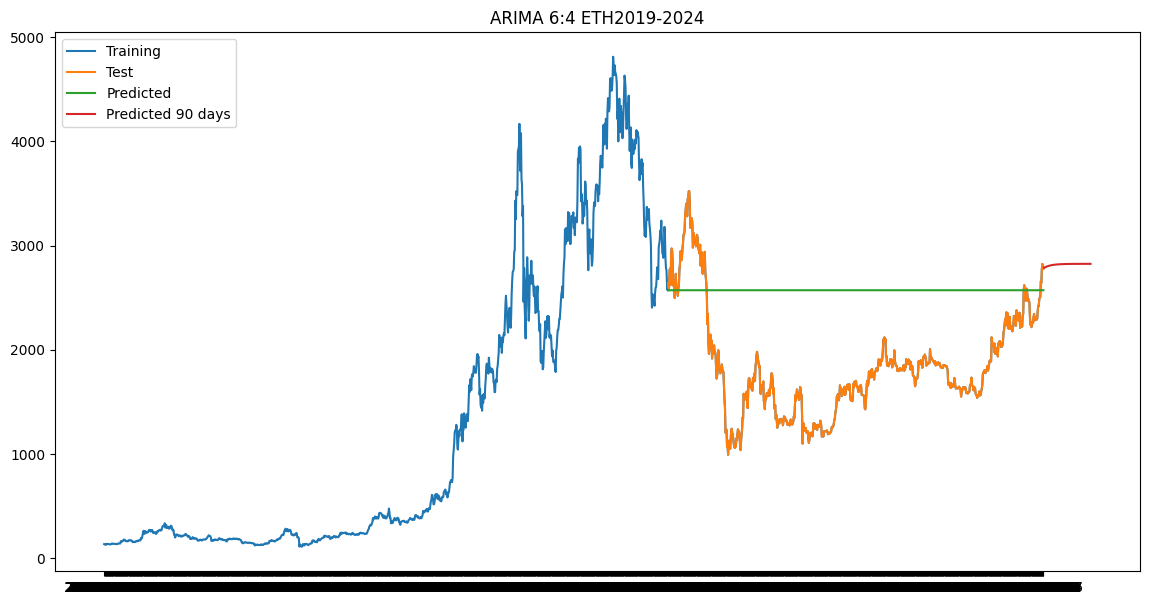

In [37]:
# Plotting the results
plt.figure(figsize=(14,7))
plt.plot(np.exp(df_log_eth), label='Training')
plt.plot(test_eth.index, np.exp(test_eth), label='Test')
plt.plot(test_eth.index, np.exp(pred), label='Predicted')
plt.plot(pred_eth.index, np.exp(pred_eth), label='Predicted 90 days')
plt.title('ARIMA 6:4 ETH2019-2024')
plt.legend(loc='upper left')
plt.show()